## **1. Data Loading & Description**

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Import Library Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeCV
from time import time
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import csv
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

c:\Users\mmush\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
mnist_train = pd.read_csv('mnist_train.csv', sep=',')
mnist_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mnist_test = pd.read_csv('mnist_test.csv', sep=',')
mnist_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
mnist_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [11]:
mnist_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


## **2. Preprocessing Data**

In [12]:
# Hitung jumlah churn dan non-churn
mnist_train['label'].value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [13]:
# Hitung jumlah churn dan non-churn
mnist_test['label'].value_counts()

label
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64

In [14]:
# # Periksa missing values
# for col in mnist_train.columns:
#     print(f'{col} : {mnist_train[col].isnull().sum()}')

# Hitung jumlah missing values per kolom
missing_values = mnist_train.isnull().sum()

# Buat DataFrame untuk tampilan yang lebih rapi
missing_df = pd.DataFrame({'missing_count': missing_values})

# Urutkan berdasarkan jumlah missing values secara descending
missing_df = missing_df.sort_values('missing_count', ascending=False)

# # Atur opsi tampilan dan cetak
pd.set_option('display.max_rows', None)
print(missing_df)

       missing_count
label              0
19x12              0
19x14              0
19x15              0
19x16              0
19x17              0
19x18              0
19x19              0
19x20              0
19x21              0
19x22              0
19x23              0
19x24              0
19x25              0
19x26              0
19x27              0
19x28              0
20x1               0
20x2               0
20x3               0
20x4               0
20x5               0
20x6               0
19x13              0
19x11              0
15x1               0
19x10              0
18x17              0
18x18              0
18x19              0
18x20              0
18x21              0
18x22              0
18x23              0
18x24              0
18x25              0
18x26              0
18x27              0
18x28              0
19x1               0
19x2               0
19x3               0
19x4               0
19x5               0
19x6               0
19x7               0
19x8         

In [15]:
# Initialize the imputer for numeric data
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the training and test datasets
train_data_imputed = imputer.fit_transform(mnist_train)
test_data_imputed = imputer.transform(mnist_test)

# # Convert the imputed data back to a DataFrame
# mnist_train = pd.DataFrame(train_data_imputed, columns=mnist_train.columns)
# mnist_test = pd.DataFrame(test_data_imputed, columns=mnist_test.columns)

### Data Balancing

In [16]:
# # Hitung jumlah churn dan non-churn
# WDBC['Output'].value_counts()

In [17]:
# X = new_churn.drop(['IS_CHURN', 'LOS_GROUP', 'PAYMENT_METHOD', 'KAT_HVC_NEW'], axis=1)
# y = new_churn['IS_CHURN']

In [18]:
# smote = SMOTEENN()
# X_resampled, y_resampled = smote.fit_resample(X_new, y)

# print("The new data contains {} rows".format(X_resampled.shape[0]))

In [19]:
# y_resampled.value_counts()

In [20]:
# # Hitung distribusi dari nilai y_resampled
# y_counts = y_resampled.value_counts()

# # Buat pie chart berdasarkan distribusi y_resampled
# plt.pie(
#     y_counts,
#     labels=['Not-Churn Customer', 'Churn Customer'],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=['#FF5733', 'yellow'],
#     explode=(0, 0.1)
# )

# # Tambahkan judul
# plt.title('Churn - Not-Churn %')

# # Tampilkan plot
# plt.show()

### Data Splitting

In [21]:
mnist_train['y'] = mnist_train['label']

mnist_test['y'] = mnist_test['label']

mnist_train = mnist_train.drop('label', axis=1)

mnist_test = mnist_test.drop('label', axis=1)

In [22]:
# Split the data into features (X) and target (y)
X_train = mnist_train.drop('y', axis=1)
y_train = mnist_train['y']

X_test = mnist_test.drop('y', axis=1)
y_test = mnist_test['y']

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [24]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

## **3. Build Model**

In [25]:
# # Fungsi untuk mencetak laporan klasifikasi, akurasi, confusion matrix, AUC & ROC
# def evaluate_model(model, X_test, y_test):
#     y_pred = model.predict(X_test)
#     print('Classification report:\n', metrics.classification_report(y_test, y_pred))
#     print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
#     print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

#     # Menghitung AUC & ROC
#     if hasattr(model, "predict_proba"):
#         y_pred_proba = model.predict_proba(X_test)[:,1]
#         fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#         roc_auc = auc(fpr, tpr)
#         print('AUC:', roc_auc)

#         # Plot ROC curve
#         plt.figure()
#         plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#         plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#         plt.xlim([0.0, 1.0])
#         plt.ylim([0.0, 1.05])
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('Receiver Operating Characteristic')
#         plt.legend(loc="lower right")
#         plt.show()
#     elif hasattr(model, "decision_function"):
#         y_scores = model.decision_function(X_test)
#         fpr, tpr, _ = roc_curve(y_test, y_scores)
#         roc_auc = roc_auc_score(y_test, y_scores)
#         print('AUC:', roc_auc)

#         # Plot ROC curve
#         plt.figure()
#         plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#         plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#         plt.xlim([0.0, 1.0])
#         plt.ylim([0.0, 1.05])
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('Receiver Operating Characteristic')
#         plt.legend(loc="lower right")
#         plt.show()
#     else:
#         print("Model does not support predict_proba method.")

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Classification report:\n', metrics.classification_report(y_test, y_pred))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

    # Menghitung AUC & ROC untuk multikelas
    if hasattr(model, "predict_proba"):
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        y_pred_proba = model.predict_proba(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(y_test_bin.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve untuk setiap kelas
        plt.figure()
        for i in range(y_test_bin.shape[1]):
            plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for Multiclass')
        plt.legend(loc="lower right")
        plt.show()
    elif hasattr(model, "decision_function"):
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        y_scores = model.decision_function(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(y_test_bin.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve untuk setiap kelas
        plt.figure()
        for i in range(y_test_bin.shape[1]):
            plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic for Multiclass')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Model does not support predict_proba method.")

### Decision Tree

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.96      0.96      0.96      1135
           2       0.86      0.84      0.85      1032
           3       0.83      0.85      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.84      0.83      0.83       892
           6       0.90      0.89      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.83      0.81      0.82       974
           9       0.85      0.86      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy: 0.8781
Confusion Matrix:
 [[ 917    0    9    5    3   11   14    4   10    7]
 [   1 1092   10    4    2    6    7    4    8    1]
 [  15   11  871   33   16   13   11   28   26    8]
 [   7    5   33  862 

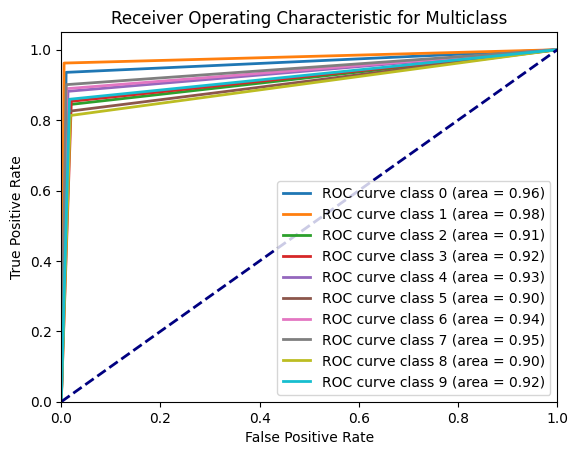

In [26]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
evaluate_model(dtree, X_test, y_test)

In [27]:
# # Hyperparameter Tuning
# # Randomized Search
# param_dist = {'max_depth': randint(1,20), 'min_samples_split': randint(2,20)}
# dt = DecisionTreeClassifier()
# rand_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=5, cv=5)
# rand_search.fit(X_train, y_train)
# best_dt = rand_search.best_estimator_
# print('Best hyperparameters for Decision Tree:', rand_search.best_params_)

# # Grid Search
# parameters = {'max_depth': range(5,20,5), 'min_samples_split': range(2,20,5)}
# grid_search = GridSearchCV(dt, parameters, cv=5)
# grid_search.fit(X_train, y_train)

In [28]:
# hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# hasil_grid_df.to_csv ('hasil_grid_search_params_churn.csv', index = False, header=True)

In [29]:
# y_pred = best_dt.predict(X_test)
# print('Classification report:\n', metrics.classification_report(y_test, y_pred))
# print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# # Menghitung AUC & ROC
# if hasattr(best_dt, "predict_proba"):
#   y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#   y_pred_proba = best_dt.predict_proba(X_test)
#   fpr = dict()
#   tpr = dict()
#   roc_auc = dict()
#   for i in range(y_test_bin.shape[1]):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

#   # Plot ROC curve untuk setiap kelas
#   plt.figure()
#   for i in range(y_test_bin.shape[1]):
#     plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
#   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#   plt.xlim([0.0, 1.0])
#   plt.ylim([0.0, 1.05])
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title('Receiver Operating Characteristic for Multiclass')
#   plt.legend(loc="lower right")
#   plt.show()
# else:
#   print("Model does not support predict_proba method.")

In [30]:
# # Generate predictions with the best model
# y_pred = best_dt.predict(X_test)
# # Create the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [31]:
# target_names = ['class 0', 'class 1']

# def classifaction_report_csv(report):
#     report_data = []
#     lines = report.split('\n')
#     for line in lines[2:-3]:
#         row = {}
#         row_data = line.split('      ')
#         row['class'] = row_data[0]
#         row['precision'] = float(row_data[1])
#         row['recall'] = float(row_data[2])
#         row['f1_score'] = float(row_data[3])
#         row['support'] = float(row_data[4])
#         report_data.append(row)
#     dataframe = pd.DataFrame.from_dict(report_data)
#     dataframe.to_csv('report_mnist.csv', index = False)

# #call the classification_report first and then our new function

# report = classification_report(y_test, y_pred, target_names=target_names)
# classifaction_report_csv(report)

### Random Forest

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy: 0.9696
Confusion Matrix:
 [[ 969    0    0    0    0    3    3    1    3    1]
 [   0 1126    1    2    0    2    2    1    1    0]
 [   6    0  997    8    3    0    4    8    6    0]
 [   1    0   13  969 

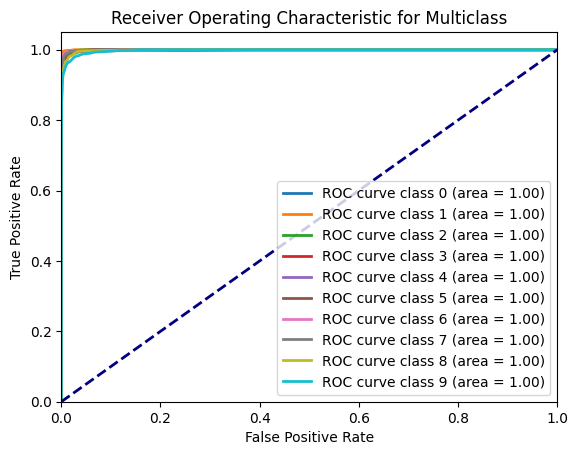

In [32]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)

In [33]:
# # Hyperparameter Tuning
# # Randomized Search
# param_dist = {'n_estimators': randint(10,500),
#               'max_depth': randint(1,20)}
# # Create a random forest classifier
# rf = RandomForestClassifier()
# # Use random search to find the best hyperparameters
# rand_search = RandomizedSearchCV(rf,
#                                  param_distributions = param_dist,
#                                  n_iter=5,
#                                  cv=5)
# # Fit the random search object to the data
# rand_search.fit(X_train, y_train)
# # Create a variable for the best model
# best_rf = rand_search.best_estimator_
# # Print the best hyperparameters
# print('Best hyperparameters:',  rand_search.best_params_)

# # Grid Search
# parameters = {'n_estimators':range(15,50,15), 'max_depth':range(5,20,5)}
# grid_search = GridSearchCV(rf,
#                                  parameters,
#                                  cv=5)
# grid_search.fit(X_train, y_train)

In [34]:
# hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# hasil_grid_df.to_csv ('hasil_grid_search_params_rf_churn.csv', index = False, header=True)

In [35]:
# y_pred = best_rf.predict(X_test)
# print('Classification report:\n', metrics.classification_report(y_test, y_pred))
# print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# # Menghitung AUC & ROC
# if hasattr(best_rf, "predict_proba"):
#   y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#   y_pred_proba = best_rf.predict_proba(X_test)
#   fpr = dict()
#   tpr = dict()
#   roc_auc = dict()
#   for i in range(y_test_bin.shape[1]):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

#   # Plot ROC curve untuk setiap kelas
#   plt.figure()
#   for i in range(y_test_bin.shape[1]):
#     plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
#   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#   plt.xlim([0.0, 1.0])
#   plt.ylim([0.0, 1.05])
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title('Receiver Operating Characteristic for Multiclass')
#   plt.legend(loc="lower right")
#   plt.show()
# else:
#   print("Model does not support predict_proba method.")

In [36]:
# # Generate predictions with the best model
# y_pred = best_rf.predict(X_test)

# # Create the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Logistic Regression

c:\Users\mmush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

Accuracy: 0.9255
Confusion Matrix:
 [[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916 

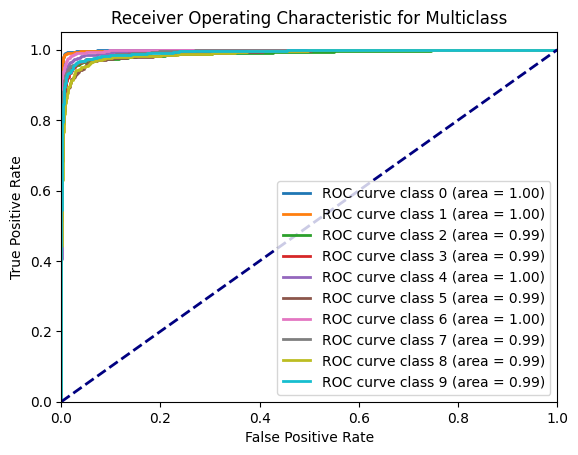

In [37]:
# Logistic Regression
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train, y_train)
evaluate_model(logreg, X_test, y_test)

In [38]:
# # Random search for Logistic Regression
# param_dist = {'C': uniform(0.1, 10), 'penalty': ['l1', 'l2', 'elasticnet', 'none']}
# lr = LogisticRegression(solver='saga', max_iter=5000)
# rand_search_lr = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=5, cv=5)
# rand_search_lr.fit(X_train, y_train)
# best_lr = rand_search_lr.best_estimator_
# print('Best hyperparameters for Logistic Regression:', rand_search_lr.best_params_)

# # Grid search for Logistic Regression
# parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
# grid_search_lr = GridSearchCV(lr, parameters, cv=5)
# grid_search_lr.fit(X_train, y_train)

In [39]:
# hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# hasil_grid_df.to_csv ('hasil_grid_search_params_lr_churn.csv', index = False, header=True)

In [40]:
# y_pred = best_lr.predict(X_test)
# print('Classification report:\n', metrics.classification_report(y_test, y_pred))
# print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# # Menghitung AUC & ROC
# if hasattr(best_lr, "predict_proba"):
#   y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#   y_pred_proba = best_lr.predict_proba(X_test)
#   fpr = dict()
#   tpr = dict()
#   roc_auc = dict()
#   for i in range(y_test_bin.shape[1]):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

#   # Plot ROC curve untuk setiap kelas
#   plt.figure()
#   for i in range(y_test_bin.shape[1]):
#     plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
#   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#   plt.xlim([0.0, 1.0])
#   plt.ylim([0.0, 1.05])
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title('Receiver Operating Characteristic for Multiclass')
#   plt.legend(loc="lower right")
#   plt.show()
# else:
#   print("Model does not support predict_proba method.")

In [41]:
# # Generate predictions with the best model
# y_pred = best_lr.predict(X_test)

# # Create the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Ridge Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       980
           1       0.84      0.98      0.90      1135
           2       0.92      0.79      0.85      1032
           3       0.85      0.87      0.86      1010
           4       0.81      0.90      0.85       982
           5       0.88      0.74      0.80       892
           6       0.88      0.91      0.90       958
           7       0.85      0.86      0.86      1028
           8       0.84      0.78      0.81       974
           9       0.84      0.79      0.82      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy: 0.8603
Confusion Matrix:
 [[ 944    0    1    2    2    7   14    2    7    1]
 [   0 1107    2    2    3    1    5    1   14    0]
 [  18   54  813   26   15    0   42   22   37    5]
 [   4   17   23  880 

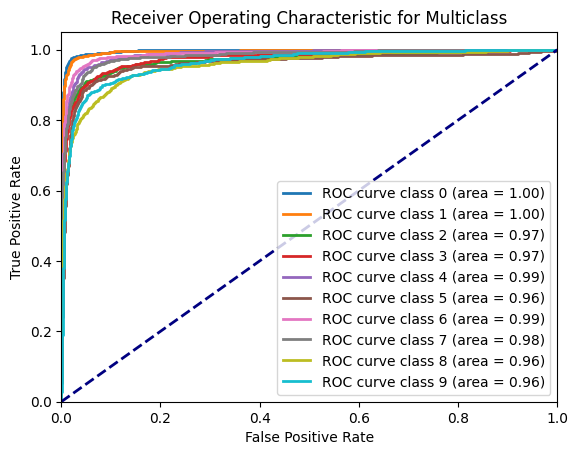

In [42]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
evaluate_model(ridge, X_test, y_test)

In [43]:
# # Random search for Ridge Classifier
# param_dist = {'alpha': uniform(0.1, 10)}
# ridge = RidgeClassifier()
# rand_search_ridge = RandomizedSearchCV(ridge, param_distributions=param_dist, n_iter=5, cv=5)
# rand_search_ridge.fit(X_train, y_train)
# best_ridge = rand_search_ridge.best_estimator_
# print('Best hyperparameters for Ridge Classifier:', rand_search_ridge.best_params_)

# # Grid search for Ridge Classifier
# parameters = {'alpha': [0.1, 1, 10]}
# grid_search_ridge = GridSearchCV(ridge, parameters, cv=5)
# grid_search_ridge.fit(X_train, y_train)

In [44]:
# hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# hasil_grid_df.to_csv ('hasil_grid_search_params_ridge_churn.csv', index = False, header=True)

In [45]:
# y_pred = best_ridge.predict(X_test)
# print('Classification report:\n', metrics.classification_report(y_test, y_pred))
# print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# # Menghitung AUC & ROC
# if hasattr(best_ridge, "predict_proba"):
#   y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#   y_pred_proba = best_ridge.predict_proba(X_test)
#   fpr = dict()
#   tpr = dict()
#   roc_auc = dict()
#   for i in range(y_test_bin.shape[1]):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

#   # Plot ROC curve untuk setiap kelas
#   plt.figure()
#   for i in range(y_test_bin.shape[1]):
#     plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
#   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#   plt.xlim([0.0, 1.0])
#   plt.ylim([0.0, 1.05])
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title('Receiver Operating Characteristic for Multiclass')
#   plt.legend(loc="lower right")
#   plt.show()
# else:
#   print("Model does not support predict_proba method.")

In [46]:
# # Generate predictions with the best model
# y_pred = best_ridge.predict(X_test)

# # Create the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### XG Boost

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy: 0.9795
Confusion Matrix:
 [[ 970    1    0    0    0    2    3    1    2    1]
 [   1 1125    3    2    0    1    2    1    0    0]
 [   5    0 1008    7    2    0    0    6    3    1]
 [   1    0    3  990 

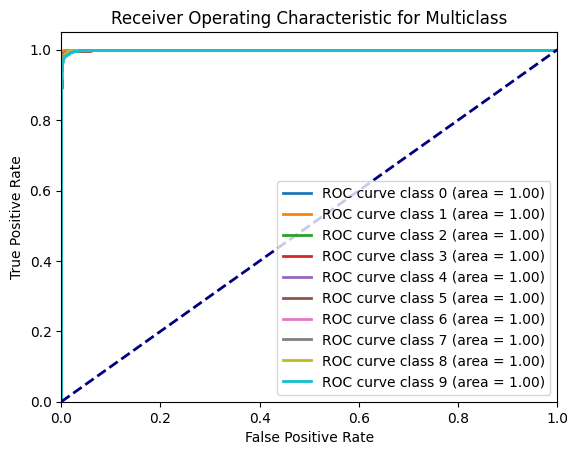

In [47]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test)

In [48]:
# # Random search for XGBoost
# param_dist = {'n_estimators': randint(10,500), 'max_depth': randint(1,20)}
# xgb = XGBClassifier()
# rand_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=5, cv=5)
# rand_search_xgb.fit(X_train, y_train)
# best_xgb = rand_search_xgb.best_estimator_
# print('Best hyperparameters for XGBoost:', rand_search_xgb.best_params_)

# # Grid search for XGBoost
# parameters = {'n_estimators': range(15,50,15), 'max_depth': range(5,20,5)}
# grid_search_xgb = GridSearchCV(xgb, parameters, cv=5)
# grid_search_xgb.fit(X_train, y_train)

In [49]:
# hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# hasil_grid_df.to_csv ('hasil_grid_search_params_xgb_churn.csv', index = False, header=True)

In [50]:
# y_pred = best_xgb.predict(X_test)
# print('Classification report:\n', metrics.classification_report(y_test, y_pred))
# print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# # Menghitung AUC & ROC
# if hasattr(best_xgb, "predict_proba"):
#   y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#   y_pred_proba = best_xgb.predict_proba(X_test)
#   fpr = dict()
#   tpr = dict()
#   roc_auc = dict()
#   for i in range(y_test_bin.shape[1]):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

#   # Plot ROC curve untuk setiap kelas
#   plt.figure()
#   for i in range(y_test_bin.shape[1]):
#     plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
#   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#   plt.xlim([0.0, 1.0])
#   plt.ylim([0.0, 1.05])
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title('Receiver Operating Characteristic for Multiclass')
#   plt.legend(loc="lower right")
#   plt.show()
# else:
#   print("Model does not support predict_proba method.")

In [51]:
# # Generate predictions with the best model
# y_pred = best_xgb.predict(X_test)

# # Create the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Cat Boost

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy: 0.9741
Confusion Matrix:
 [[ 970    0    2    1    0    1    3    1    2    0]
 [   0 1124    1    3    0    1    3    0    3    0]
 [   3    2 1001    5    4    1    2    7    7    0]
 [   0    0    4  986 

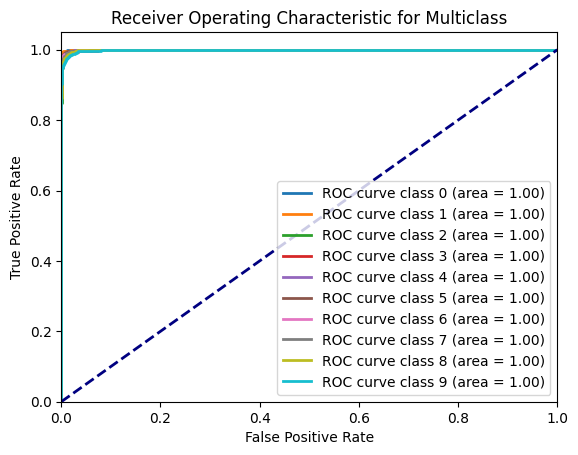

In [52]:
catboost = CatBoostClassifier(verbose=0)  # verbose=0 untuk menonaktifkan output selama pelatihan
catboost.fit(X_train, y_train)
evaluate_model(catboost, X_test, y_test)

In [53]:
# # Random search for CatBoost
# param_dist = {'iterations': randint(10,500), 'depth': randint(1,10)}
# catboost = CatBoostClassifier(verbose=0)
# rand_search_catboost = RandomizedSearchCV(catboost, param_distributions=param_dist, n_iter=5, cv=5)
# rand_search_catboost.fit(X_train, y_train)
# best_catboost = rand_search_catboost.best_estimator_
# print('Best hyperparameters for CatBoost:', rand_search_catboost.best_params_)

# # Grid search for CatBoost
# parameters = {'iterations': range(50,200,50), 'depth': range(3,10,2)}
# grid_search_catboost = GridSearchCV(catboost, parameters, cv=5)
# grid_search_catboost.fit(X_train, y_train)

In [54]:
# hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# hasil_grid_df.to_csv ('hasil_grid_search_params_catboost_churn.csv', index = False, header=True)

In [55]:
# y_pred = best_catboost.predict(X_test)
# print('Classification report:\n', metrics.classification_report(y_test, y_pred))
# print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# # Menghitung AUC & ROC
# if hasattr(best_catboost, "predict_proba"):
#   y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#   y_pred_proba = best_catboost.predict_proba(X_test)
#   fpr = dict()
#   tpr = dict()
#   roc_auc = dict()
#   for i in range(y_test_bin.shape[1]):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

#   # Plot ROC curve untuk setiap kelas
#   plt.figure()
#   for i in range(y_test_bin.shape[1]):
#     plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
#   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#   plt.xlim([0.0, 1.0])
#   plt.ylim([0.0, 1.05])
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title('Receiver Operating Characteristic for Multiclass')
#   plt.legend(loc="lower right")
#   plt.show()
# else:
#   print("Model does not support predict_proba method.")

In [56]:
# # Generate predictions with the best model
# y_pred = best_catboost.predict(X_test)

# # Create the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Light GBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.271016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 109606
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 629
[LightGBM] [Info] Start training from score -2.315501
[LightGBM] [Info] Start training from score -2.185988
[LightGBM] [Info] Start training from score -2.309610
[LightGBM] [Info] Start training from score -2.280987
[LightGBM] [Info] Start training from score -2.329271
[LightGBM] [Info] Start training from score -2.404064
[LightGBM] [Info] Start training from score -2.316346
[LightGBM] [Info] Start training from score -2.259366
[LightGBM] [Info] Start training from score -2.327732
[LightGBM] [Info] Start training from score -2.311121
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99  

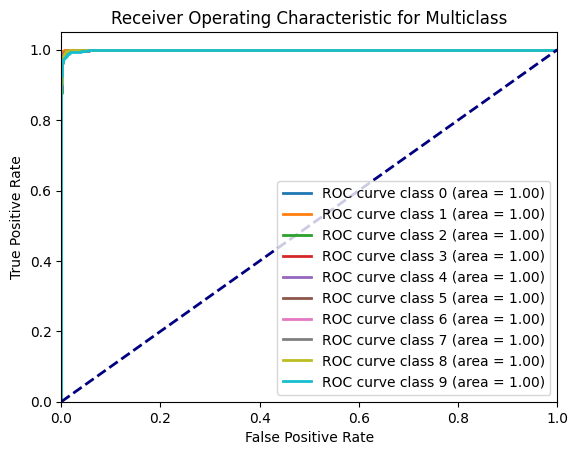

In [57]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
evaluate_model(lgbm, X_test, y_test)

In [58]:
# # Random search for LightGBM
# param_dist = {'n_estimators': randint(10,500), 'max_depth': randint(1,20)}
# lgbm = LGBMClassifier()
# rand_search_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_dist, n_iter=5, cv=5)
# rand_search_lgbm.fit(X_train, y_train)
# best_lgbm = rand_search_lgbm.best_estimator_
# print('Best hyperparameters for LightGBM:', rand_search_lgbm.best_params_)

# # Grid search for LightGBM
# parameters = {'n_estimators': range(15,50,15), 'max_depth': range(5,20,5)}
# grid_search_lgbm = GridSearchCV(lgbm, parameters, cv=5)
# grid_search_lgbm.fit(X_train, y_train)

In [59]:
# hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# hasil_grid_df.to_csv ('hasil_grid_search_params_lgbm_churn.csv', index = False, header=True)

In [60]:
# y_pred = best_lgbm.predict(X_test)
# print('Classification report:\n', metrics.classification_report(y_test, y_pred))
# print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# # Menghitung AUC & ROC
# if hasattr(best_lgbm, "predict_proba"):
#   y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#   y_pred_proba = best_lgbm.predict_proba(X_test)
#   fpr = dict()
#   tpr = dict()
#   roc_auc = dict()
#   for i in range(y_test_bin.shape[1]):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

#   # Plot ROC curve untuk setiap kelas
#   plt.figure()
#   for i in range(y_test_bin.shape[1]):
#     plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
#   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#   plt.xlim([0.0, 1.0])
#   plt.ylim([0.0, 1.05])
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title('Receiver Operating Characteristic for Multiclass')
#   plt.legend(loc="lower right")
#   plt.show()
# else:
#   print("Model does not support predict_proba method.")

In [61]:
# # Generate predictions with the best model
# y_pred = best_lgbm.predict(X_test)

# # Create the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### KNN

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy: 0.9705
Confusion Matrix:
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976 

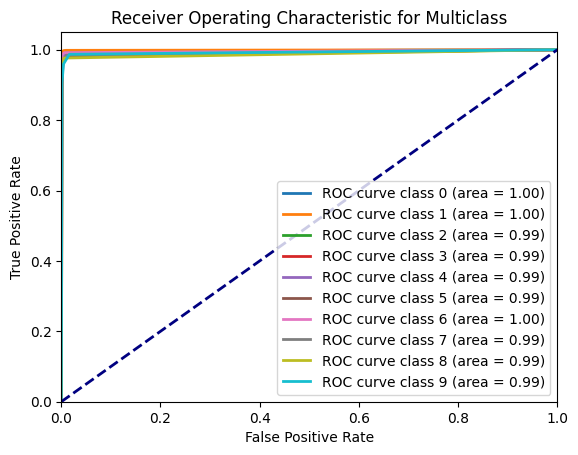

In [62]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)

In [63]:
# # Random search for KNN
# param_dist = {'n_neighbors': randint(1,30), 'weights': ['uniform', 'distance']}
# knn = KNeighborsClassifier()
# rand_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=5, cv=5)
# rand_search_knn.fit(X_train, y_train)
# best_knn = rand_search_knn.best_estimator_
# print('Best hyperparameters for KNN:', rand_search_knn.best_params_)

# # Grid search for KNN
# parameters = {'n_neighbors': range(1,30,5), 'weights': ['uniform', 'distance']}
# grid_search_knn = GridSearchCV(knn, parameters, cv=5)
# grid_search_knn.fit(X_train, y_train)

In [64]:
# hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# hasil_grid_df.to_csv ('hasil_grid_search_params_knn_churn.csv', index = False, header=True)

In [65]:
# y_pred = best_knn.predict(X_test)
# print('Classification report:\n', metrics.classification_report(y_test, y_pred))
# print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# # Menghitung AUC & ROC
# if hasattr(best_knn, "predict_proba"):
#   y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#   y_pred_proba = best_knn.predict_proba(X_test)
#   fpr = dict()
#   tpr = dict()
#   roc_auc = dict()
#   for i in range(y_test_bin.shape[1]):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

#   # Plot ROC curve untuk setiap kelas
#   plt.figure()
#   for i in range(y_test_bin.shape[1]):
#     plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
#   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#   plt.xlim([0.0, 1.0])
#   plt.ylim([0.0, 1.05])
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title('Receiver Operating Characteristic for Multiclass')
#   plt.legend(loc="lower right")
#   plt.show()
# else:
#   print("Model does not support predict_proba method.")

In [66]:
# # Generate predictions with the best model
# y_pred = best_knn.predict(X_test)

# # Create the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# ConfusionMatrixDisplay(confusion_matrix=cm).plot();